In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_excel("pomiary2017.xlsx")

df = df.to_numpy()
df[1][4], df[1][5] = df[1][5], df[1][4]

wzrost = df[:, 5]

df[3][5] = float(np.nanmean(wzrost).round(2))

waga = df[:, -3]

plec = df[:, -1]

features = np.column_stack((wzrost, waga))

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(features, plec)

knn.predict([[160, 83]])

array(['M'], dtype=object)

# Zadanie

In [3]:
from sklearn.model_selection import train_test_split

plec_num = np.where(plec == 'K', 0, 1)

features_train, features_test, target_train, target_test = train_test_split(features, plec_num, random_state=42)

# zbadaj jak liczba sąsiadów wpływa na elastyczność modelu

sprawdzimy jak zmienia się wariancja i jak zmienia się obciążenie modelu??

potestujemy jak predykcja się zmieni wraz z różnymi parametrami dla N, nieparzystych, przedstawimy to na wykresie

uruchomimy to pare razy dla pewności

sprawdzimy dla danych skrajnych - np. jeden punkt, sprawdzimy czy się pogubi, a potem zwiększymy dla 3 i zobaczymy co się wtedy stanie?

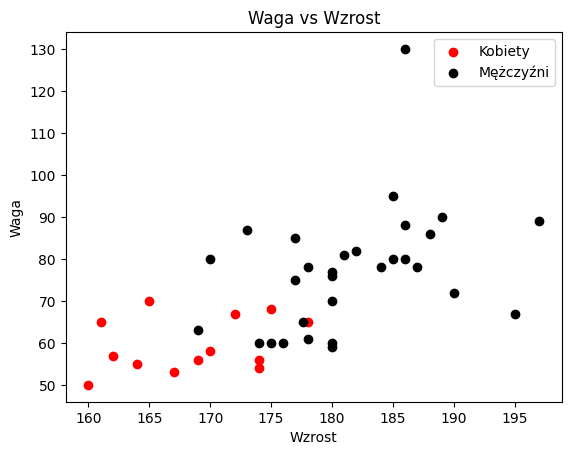

In [ ]:
plt.scatter(wzrost[plec == 'K'], waga[plec == 'K'], c='red', label='Kobiety')
plt.scatter(wzrost[plec == 'M'], waga[plec == 'M'], c='black', label='Mężczyźni')
plt.xlabel('Wzrost')
plt.ylabel('Waga')
plt.title('Waga vs Wzrost')
plt.legend()
plt.show()

In [15]:


def plot_chart():
    plt.scatter(wzrost[plec == 'K'], waga[plec == 'K'], c='red', label='Kobiety')
    plt.scatter(wzrost[plec == 'M'], waga[plec == 'M'], c='black', label='Mężczyźni')
    plt.xlabel('Wzrost')
    plt.ylabel('Waga')
    plt.title('Waga vs Wzrost')
    plt.legend()
    
    return plt

def test_prediction_for_n_neighbors(neighbors, to_predict=[[185, 83]]):
    knn = KNeighborsClassifier(n_neighbors=neighbors)

    knn.fit(features, plec)

    return knn.predict(to_predict)


test_prediction_for_n_neighbors(1)

array(['M'], dtype=object)

# Początek

Zaczniemy od przetestowania algorytmu dla 1 sąsiada i sprawdzimy jakie ma to cechy. Sprawdzimy co nasz algorytm przewidzi dla mojego wzrostu.

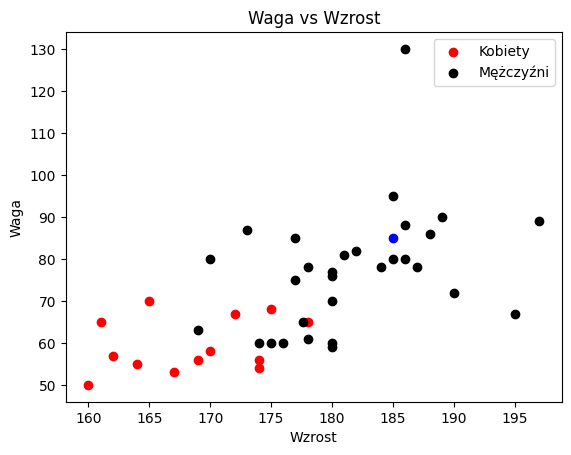

Dla wzrostu 185 i wagi 85kg przewidziano M


In [ ]:
# Parametry

# Wzrost, waga
punkt = [185, 85]
liczba_sasiadow = 1

# Kod testujący

predykcja = test_prediction_for_n_neighbors(liczba_sasiadow, to_predict=[punkt])

plt = plot_chart()
plt.scatter(punkt[0], punkt[1], c="blue")
plt.show()

print(f"Dla wzrostu {punkt[0]} i wagi {punkt[1]}kg przewidziano {predykcja[0]}")

## Sukces!

Na wykresie **niebieską kropką** zaznaczono gdzie końcowo kończy nasz punkt. W tym wypadku algorytm poprawnie stwierdził, że jestem mężczyzną. Czy to znaczy, że wystarczy ustawić liczbę sąsiadów na 1 i to koniec? Nie do końca.

## Diabeł tkwi w szczegółach

Sprawdźmy co nasz algorytm przewidzi dla innego zestawu danych, mojego kolegi, który jest chudy jak na swój wzrost.

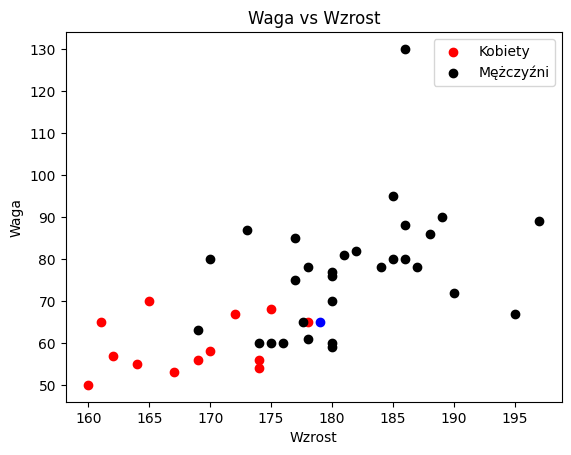

Dla wzrostu 179 i wagi 65kg przewidziano K


In [ ]:
# Parametry

# Wzrost, waga
punkt = [179, 65]
liczba_sasiadow = 1

# Kod testujący

predykcja = test_prediction_for_n_neighbors(liczba_sasiadow, to_predict=[punkt])

plt = plot_chart()
plt.scatter(punkt[0], punkt[1], c="blue")
plt.show()

print(f"Dla wzrostu {punkt[0]} i wagi {punkt[1]}kg przewidziano {predykcja[0]}")

## Błąd!

Jak widać algorytm nie spełnił swojego zadania - mimo tego, że w tej części wykresu są sami mężczyźni! Dlaczego? Bo **najbliżej była kobieta**, która odbiega od reszty zbioru danych. Co możemy z tym zrobić? A no właśnie, zwiększyć liczbę sąsiadów. **Zwiększmy do 3** - lepiej stosować nieparzyste liczby, bo w przypadku remisu ciężko zdecydować kto wygrał.

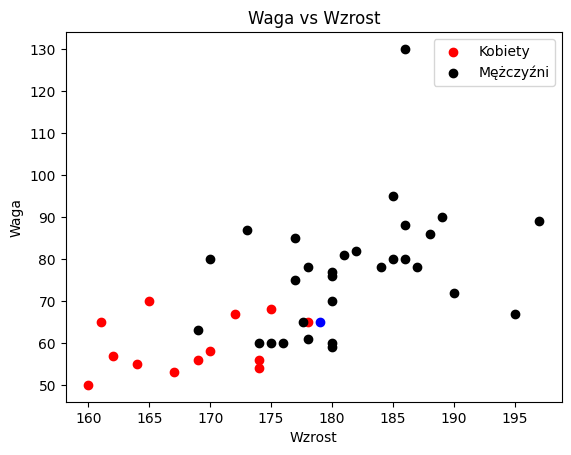

Dla wzrostu 179 i wagi 65kg przewidziano M


In [ ]:
# ** Parametry **

# Wzrost, waga
punkt = [179, 65]
liczba_sasiadow = 3

# Kod testujący

predykcja = test_prediction_for_n_neighbors(liczba_sasiadow, to_predict=[punkt])

plt = plot_chart()
plt.scatter(punkt[0], punkt[1], c="blue")
plt.show()

print(f"Dla wzrostu {punkt[0]} i wagi {punkt[1]}kg przewidziano {predykcja[0]}")

## Sukces znowu!

Jak widać zwiększenie liczby sąsiadów pomogło - znaleźliśmy wspaniały lek. Ale nie ograniczajmy się do 3, co się stanie jak spróbujemy dobrać więcej sąsiadów, jak na razie wychodzi nam, że więcej znaczy lepiej.

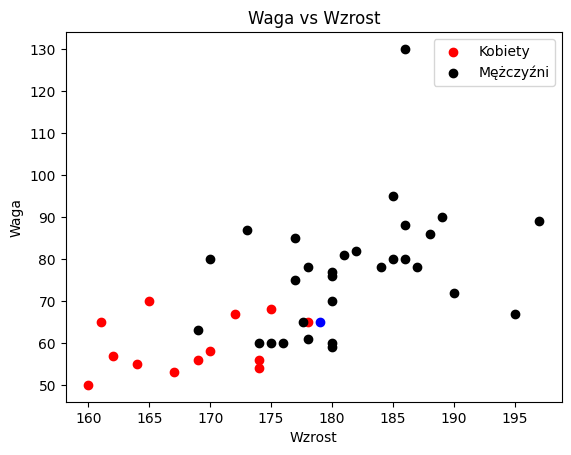

Dla wzrostu 179 i wagi 65kg przewidziano M


In [ ]:
# Parametry

# Wzrost, waga
punkt = [179, 65]
liczba_sasiadow = 12

# Kod testujący

predykcja = test_prediction_for_n_neighbors(liczba_sasiadow, to_predict=[punkt])

plt = plot_chart()
plt.scatter(punkt[0], punkt[1], c="blue")
plt.show()

print(f"Dla wzrostu {punkt[0]} i wagi {punkt[1]}kg przewidziano {predykcja[0]}")

## Wciąż sukces

Nadal wszystko działa poprawnie. Spróbujmy jednak przetestować ten algorytm dla mojej koleżanki.

Przetestujmy dla 12 sąsiadów, 24 i 36.

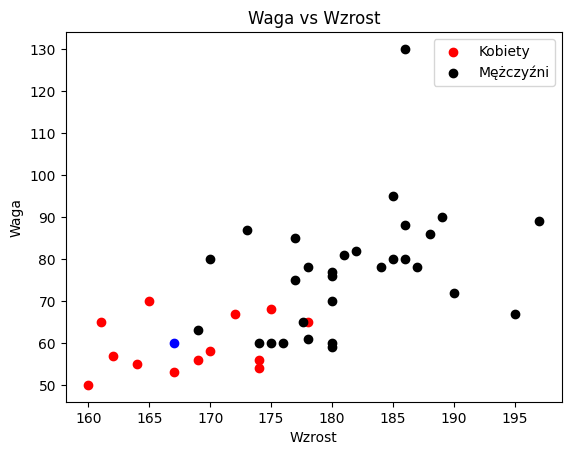

Dla wzrostu 167 i wagi 60kg przewidziano K


In [36]:
# Parametry

# Wzrost, waga
punkt = [167, 60]
liczba_sasiadow = 12

# Kod testujący

predykcja = test_prediction_for_n_neighbors(liczba_sasiadow, to_predict=[punkt])

plt = plot_chart()
plt.scatter(punkt[0], punkt[1], c="blue")
plt.show()

print(f"Dla wzrostu {punkt[0]} i wagi {punkt[1]}kg przewidziano {predykcja[0]}")

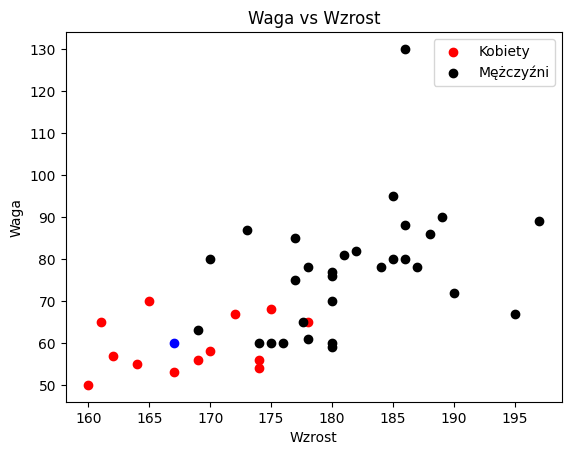

Dla wzrostu 167 i wagi 60kg przewidziano K


In [37]:
# Parametry

# Wzrost, waga
punkt = [167, 60]
liczba_sasiadow = 24

# Kod testujący

predykcja = test_prediction_for_n_neighbors(liczba_sasiadow, to_predict=[punkt])

plt = plot_chart()
plt.scatter(punkt[0], punkt[1], c="blue")
plt.show()

print(f"Dla wzrostu {punkt[0]} i wagi {punkt[1]}kg przewidziano {predykcja[0]}")

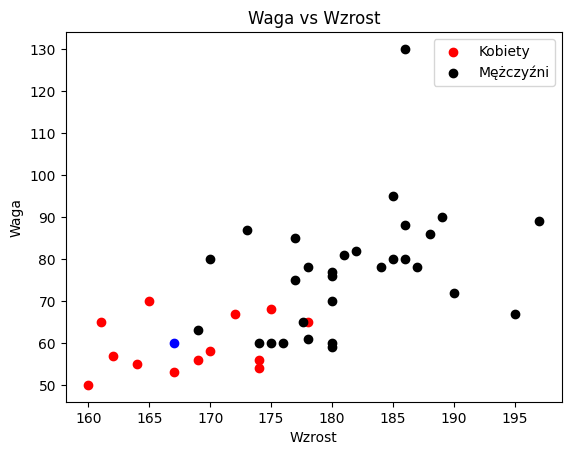

Dla wzrostu 167 i wagi 60kg przewidziano M


In [38]:
# Parametry

# Wzrost, waga
punkt = [167, 60]
liczba_sasiadow = 36

# Kod testujący

predykcja = test_prediction_for_n_neighbors(liczba_sasiadow, to_predict=[punkt])

plt = plot_chart()
plt.scatter(punkt[0], punkt[1], c="blue")
plt.show()

print(f"Dla wzrostu {punkt[0]} i wagi {punkt[1]}kg przewidziano {predykcja[0]}")

## Znowu błąd!

Co się stało? Przy liczbie 36 wyszło na to, że moja koleżanka jest mężczyzną. Dlaczego? Zobaczmy że ilość kobiet w naszym zbiorze danych jest mniejsza niż 36 - i algorytm miał do wyboru potem już tylko samych mężczyzn, mimo tego, że byli daleko od naszego punktu.

# Wnioski

Jak widać, dobór ilości najbliższych sąsiadów zależy znacząco od ilości danych
- **damy za mało** -> osoby nietypowe będą mocno wpływały na wynik
- **damy za dużo** -> ilość danej klasy w zbiorze będzie znacząco wpływała na wynik

Jakie jest rozwiązanie w takim razie? Myślenie i testowanie, nie ma złotej recepty na liczbę sąsiadów.